In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.linear_model import LinearRegression, RANSACRegressor

In [10]:
dataset = fetch_california_housing(as_frame=True)

In [8]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [13]:
house_prices = dataset.frame

In [14]:
house_prices

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


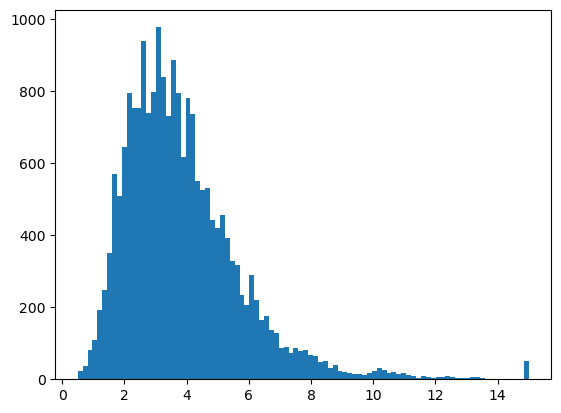

In [16]:
plt.hist(house_prices.MedInc, bins="fd")
plt.show()

In [19]:
house_prices[house_prices.MedInc > 15].sort_values("MedInc")

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
1566,15.0001,2.0,22.222222,2.222222,25.0,2.777778,37.74,-121.96,3.50000
8850,15.0001,37.0,9.333333,1.037801,809.0,2.780069,34.09,-118.41,5.00001
8851,15.0001,40.0,9.600000,1.059459,1024.0,2.767568,34.09,-118.42,5.00001
8852,15.0001,48.0,9.729839,1.052419,770.0,3.104839,34.08,-118.42,5.00001
8853,15.0001,52.0,9.867036,1.091413,1163.0,3.221607,34.07,-118.41,5.00001
8854,15.0001,52.0,8.710145,1.028986,408.0,2.956522,34.07,-118.41,5.00001
8878,15.0001,52.0,8.000000,0.997333,1143.0,3.048000,34.04,-118.50,5.00001
10673,15.0001,13.0,7.842900,0.993958,1865.0,2.817221,33.62,-117.85,5.00001
10760,15.0001,15.0,8.062044,1.003650,735.0,2.682482,33.62,-117.87,5.00001
11520,15.0001,14.0,8.354232,1.037618,964.0,3.021944,33.72,-118.06,5.00001


In [20]:
house_prices.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


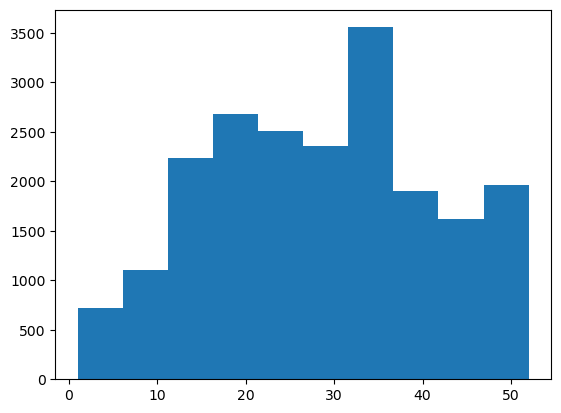

In [23]:
plt.hist(house_prices.HouseAge, bins = 10)
plt.show()

In [24]:
house_prices.HouseAge.value_counts()

HouseAge
52.0    1273
36.0     862
35.0     824
16.0     771
17.0     698
34.0     689
26.0     619
33.0     615
18.0     570
25.0     566
32.0     565
37.0     537
15.0     512
19.0     502
27.0     488
24.0     478
30.0     476
28.0     471
20.0     465
29.0     461
31.0     458
23.0     448
21.0     446
14.0     412
22.0     399
38.0     394
39.0     369
42.0     368
44.0     356
43.0     353
40.0     304
13.0     302
41.0     296
45.0     294
10.0     264
11.0     254
46.0     245
5.0      244
12.0     238
8.0      206
9.0      205
47.0     198
4.0      191
48.0     177
7.0      175
6.0      160
50.0     136
49.0     134
3.0       62
2.0       58
51.0      48
1.0        4
Name: count, dtype: int64

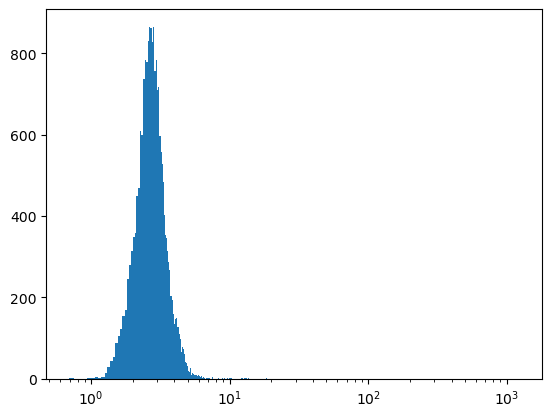

In [26]:
plt.hist(house_prices.AveOccup, bins = "fd")
plt.semilogx()
plt.show()

In [28]:
house_model = LinearRegression()

In [32]:
house_attributes = house_prices.drop(columns= ["MedHouseVal"])
house_values = house_prices.MedHouseVal

In [33]:
house_model.fit(house_attributes, house_values)

LinearRegression()

In [34]:
house_model.coef_

array([ 4.36693293e-01,  9.43577803e-03, -1.07322041e-01,  6.45065694e-01,
       -3.97638942e-06, -3.78654265e-03, -4.21314378e-01, -4.34513755e-01])

In [38]:
scaler = MinMaxScaler()
house_attributes_scale = scaler.fit_transform(house_attributes)

In [42]:
house_model_scaled = LinearRegression()
house_model_scaled.fit(house_attributes_scale, house_values)

LinearRegression()

In [43]:
house_model_scaled.coef_

array([  6.33214009,   0.48122468, -15.13916237,  21.76021606,
        -0.1418736 ,  -4.70531325,  -3.96456829,  -4.3625181 ])

In [45]:
z_score = StandardScaler().fit_transform(house_attributes)

In [46]:
z_score_model = LinearRegression()

In [47]:
z_score_model.fit(z_score, house_values)

LinearRegression()

In [48]:
z_score_model.coef_

array([ 0.8296193 ,  0.11875165, -0.26552688,  0.30569623, -0.004503  ,
       -0.03932627, -0.89988565, -0.870541  ])

In [51]:
ransac_model = RANSACRegressor()

In [52]:
ransac_model.fit(house_attributes, house_values)

RANSACRegressor()

In [53]:
ransac_model.estimator_.coef_

array([ 4.58937263e-01,  1.91872766e-03, -1.05542583e-01,  4.63893348e-01,
       -6.82482218e-06, -7.57789294e-02, -4.99616672e-01, -5.26152179e-01])